# Графики плотности и контурные графики

Иногда удобно отображать трехмерные данные в двумерной плоскости с помощью контуров или областей, кодированных различными цветами. Существует три предназначенные для этой цели функции библиотеки Matplotlib:
- plt.contour — для контурных графиков;
- plt.contourf — для контурных графиков с заполнением;
- plt.imshow — для отображения изображений. 


В этом разделе мы рассмотрим несколько примеров использования данных функций. Начнем с настройки блокнота для построения графиков и нужных нам импортов:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

__Визуализация трехмерной функции.__ Начнем с демонстрации контурного графика для функции вида z = f (x, y), воспользовавшись для этой цели функцией f (мы уже встречались с ней в разделе «Операции над массивами. Транслирование» главы 2, где использовали ее в примере транслирования массивов):

In [3]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Создать контурный график можно с помощью функции plt.contour. У нее имеется три аргумента: координатная сетка значений x, координатная сетка значений y и координатная сетка значений z. Значения x и y представлены точками на графике, а значения z будут представлены контурами уровней. Вероятно, наиболее простой способ подготовить такие данные — воспользоваться функцией np.meshgrid, формирующей двумерные координатные сетки из одномерных массивов:

In [7]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Теперь посмотрим, как это отображается на обычном линейном контурном графике:

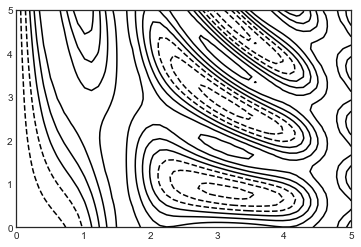

In [14]:
plt.contour(X, Y, Z, colors='black');

Обратите внимание, что по умолчанию при использовании одного цвета отрицательные значения обозначаются штриховыми линиями, а положительные — сплошными. Можно также кодировать линии различными цветами, задав карты цветов с помощью аргумента cmap. В данном случае мы также указали, что хотели бы нарисовать больше линий — разделить данные на 20 интервалов с равными промежутками:

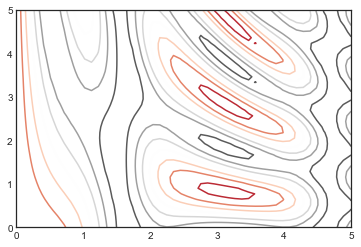

In [16]:
plt.contour(X, Y, Z, cmap='RdGy');

Мы выбрали здесь карту цветов RdGy (сокращение для Red — Gray — «красный — серый») — отличный выбор для случая центрированных данных. В библиотеке Matplotlib доступен широкий диапазон карт цветов, которые можно просмотреть в IPython путем TAB-автодополнения названия модуля plt.cm:

Наш график приобрел более приятный глазу вид, но промежутки между линиями несколько отвлекают внимание. Изменить это можно, воспользовавшись контурным графиком с заполнением, доступным посредством функции plt.contourf() (обратите внимание на букву f в конце ее названия), синтаксис которой не отличается от синтаксиса функции plt.contour().

Вдобавок мы воспользуемся командой plt.colorbar(), автоматически создающей для графика дополнительную ось с маркированной информацией о цвете:

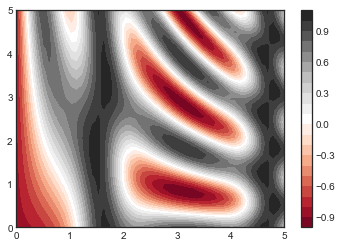

In [26]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

Потенциальная проблема этого графика — его «пятнистость». Дело в том, что градации цветов здесь дискретны, а не непрерывны, что не всегда удобно. Исправить это можно путем задания очень большого количества контуров, что приведет к низкой производительности: библиотеке Matplotlib придется визуализировать новый полигон для каждого шага уровня. Лучшее решение — воспользоваться функцией plt.imshow(), интерпретирующей двумерную сетку данных как изображение.

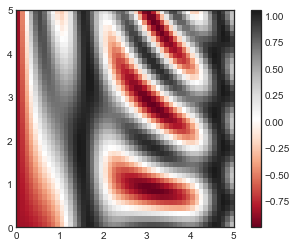

In [24]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

Однако есть несколько потенциальных проблем и с функцией imshow().
- Функция plt.imshow() не принимает в качестве параметров координатные сетки x и y, так что вам придется вручную задать размеры изображения на графике: extent [xmin, xmax, ymin, ymax].
- По умолчанию функция plt.imshow() следует стандартному определению массива для изображения, в котором начало координат находится в верхнем левом, а не в нижнем левом углу, как на большинстве контурных графиков. Это поведение можно изменить в случае отображения данных с привязкой к сетке.
- Функция plt.imshow() автоматически настраивает соотношение сторон графика в соответствии с входными данными. Это поведение можно изменить, задав, например, plt.axis(aspect='image'), чтобы отрезки по осям X и Y были одинаковыми.

Иногда удобно комбинировать контурный график с графиком-изображением.

Воспользуемся частично прозрачным фоновым изображением (задав прозрачность посредством параметра alpha) и нарисуем на самих контурах метки (с помощью функции plt.clabel()):

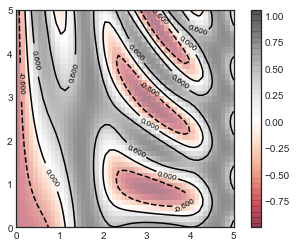

In [29]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar();

Сочетание этих трех функций — plt.contour, plt.contourf и plt.imshow — предоставляет практически неограниченные возможности по отображению подобных трехмерных данных на двумерных графиках. Дальнейшую информацию относительно имеющихся у этих функций параметров вы можете найти в их docstring. Если вас интересует трехмерная визуализация таких данных, загляните в раздел «Построение трехмерных графиков в библиотеке Matplotlib» данной главы.